<h2> Import Library

In [1]:
# cv2 is the Python Version of OpenCV
import cv2
# matplotlib is used for displaying images
import matplotlib.pyplot as plt
%matplotlib inline 
# numpy is used for matrix manipulations 
import numpy as np

<h2> Read Image

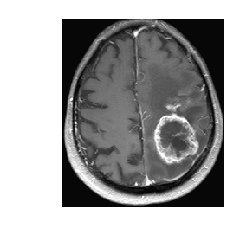

In [42]:
# Read the color image
orig_img = cv2.imread("C:/Future GSU/2018/Computer Vision/Project/Segmentation Technique/brain.png",1) 
# OpenCV uses BGR while Matplotlib uses RGB format
# Display the color image with matplotlib
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Greyscale Conversion 

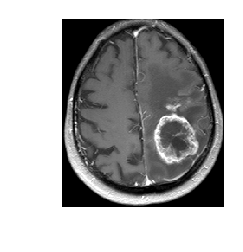

In [43]:
gray_img = cv2.cvtColor( orig_img, cv2.COLOR_BGR2GRAY ) 
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

## Median Filtering

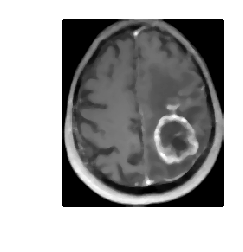

In [44]:
# To remove salt and pepper noise
# Using 5*5 kernel
median_filtered = cv2.medianBlur(gray_img, 5)
plt.imshow(median_filtered,cmap='gray')
plt.axis('off')
plt.show()

## Edge Detection

Gx 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Gy 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


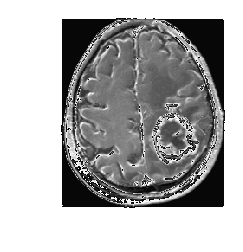

In [45]:
# 3*3 Sobel Filters
Gx= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print ("Gx \n", Gx)
Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
print ("Gy \n", Gy)
img_sobelx = cv2.Sobel(median_filtered,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(median_filtered,cv2.CV_8U,0,1,ksize=3)
#del f = Gx + Gy
# Adding mask to the image
img_sobel = img_sobelx + img_sobely+gray_img
plt.imshow(img_sobel,cmap='gray')
plt.axis('off')
plt.show()

## Thresholding 

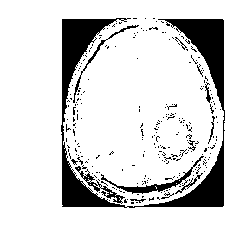

In [46]:
# Set threshold and maxValue
threshold = 50
maxValue = 255
 
# Threshold the pixel values
th, thresh = cv2.threshold(img_sobel, threshold, maxValue, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.axis('off')
plt.show()

## Background & Foreground Identification

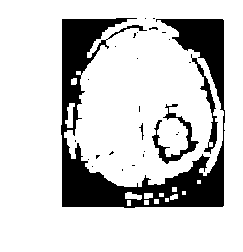

In [47]:
# To remove any small white noises in the image using morphological opening. 
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

plt.imshow(opening,cmap='gray')
plt.axis('off')
plt.show()

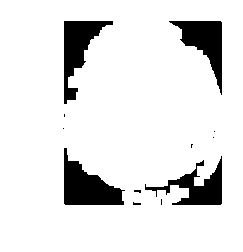

In [48]:
# Black region shows sure background area
# Dilation increases object boundary to background.
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.imshow(sure_bg,cmap='gray')
plt.axis('off')
plt.show()

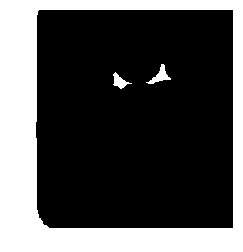

In [56]:
#  White region shows sure foreground area
#dist_transform, labels) = cv2.distanceTransform(opening,cv2.cv.CV_DIST_L2,5)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(sure_fg,cmap='gray')
plt.axis('off')
plt.show()

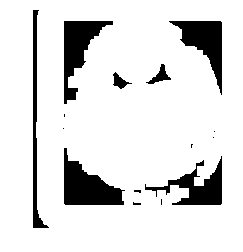

In [57]:
# Identifying regions where we don't know whether foreground and background
# Watershed algorithm
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(unknown,cmap='gray')
plt.axis('off')
plt.show()

## Watershed Segmentation

In [58]:
contours, hierarchy = cv2.findContours(sure_fg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Creating a numpy array for markers and converting the image to 32 bit using dtype paramter
marker = np.zeros((gray_img.shape[0], gray_img.shape[1]),dtype = np.int32)

marker = np.int32(sure_fg) + np.int32(sure_bg)

# Marker Labelling
for id in range(len(contours)):
    cv2.drawContours(marker,contours,id,id+2, -1)

marker = marker + 1

marker[unknown==255] = 0

copy_img = orig_img.copy()

cv2.watershed(copy_img, marker)

imgplt = plt.imshow(marker)
plt.colorbar()
plt.show()

ValueError: too many values to unpack (expected 2)

In [59]:
copy_img[marker==-1]=(0,0,255)
cv2.imwrite('img.jpg',copy_img)
plt.imshow(copy_img,cmap='gray')
plt.axis('off')
plt.show()

NameError: name 'copy_img' is not defined

## Morphological Operations
Opening is achieved by erosion followed by dilation

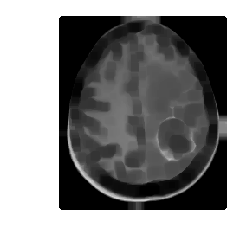

In [36]:
# The basic purpose of the operation is to show only that part of the image having 
# more intensity which has the tumor that is the part of the image forming our desired extraction.
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
erosion = cv2.morphologyEx(median_filtered, cv2.MORPH_ERODE, kernel)
plt.imshow(erosion,cmap='gray')
plt.axis('off')
plt.show()

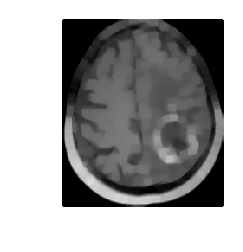

In [37]:
dilation = cv2.morphologyEx(erosion, cv2.MORPH_DILATE, kernel)
plt.imshow(dilation,cmap='gray')
plt.axis('off')
plt.show()